# Lab 8 - Using Keras to train neural nets
* Goal of this lab is to introduce a set of tools in pyhon useful for training neural nets: Keras, Google colab.
* Use 2 different neural networks to predict MNIST

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16330495335210229171
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 338690048
locality {
  bus_id: 1
}
incarnation: 17761999784191457442
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [5]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt

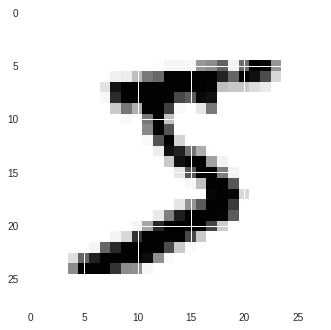

In [31]:
def disp_digit(ind):
  plt.imshow(X_train[ind, :,:])
  
interactive(disp_digit, ind = [0, 1, 2, 3])
#display(y)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


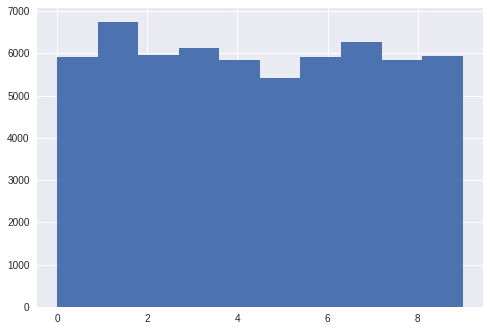

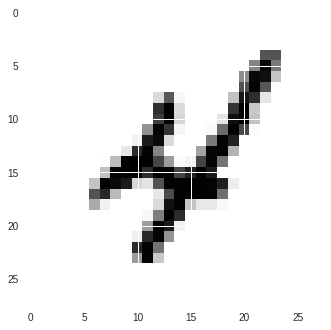

In [95]:
'''Import and Process Data'''

# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train)
plt.hist(y_train)
plt.show()
for i in range(10):
  plt.imshow(X_train[i,:,:])

In [96]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)

(60000, 28, 28, 1)


In [97]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [111]:
# 7. Define model architecture
images = Input(shape=(28, 28, 1), dtype='float32')
print(images)

#Reshapes an nd tensor to 2d tensor.
flattened_images = Flatten()(images)
print(flattened_images)

#Applies f(Wx+b) where f is the activation
hidden1 = Dense(units=32, activation='tanh')(flattened_images)
print(hidden1)
#Applies f(Wx+b) where f is the activation
pred_probs = Dense(units=10, activation='softmax')(hidden1)
print(pred_probs)

model = Model(inputs=images, outputs=pred_probs)
print(model)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 9. Fit model on training data
model.fit(X_train, Y_train,
          batch_size=32, epochs=3, verbose=1)

# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

print("Test loss: "+str(score[0]))
print("Test acc: "+str(score[1]))

Tensor("input_20:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("flatten_29/Reshape:0", shape=(?, ?), dtype=float32)
Tensor("dense_50/Tanh:0", shape=(?, 32), dtype=float32)
Tensor("dense_51/Softmax:0", shape=(?, 10), dtype=float32)
Epoch 1/3
60000/60000 [==============================] - 10s 173us/step - loss: 0.3631 - acc: 0.9011
Epoch 2/3
20448/60000 [=========>....................] - ETA: 6s - loss: 0.2004 - acc: 0.9426

60000/60000 [==============================] - 10s 159us/step - loss: 0.1962 - acc: 0.9436
Epoch 3/3
60000/60000 [==============================] - 10s 159us/step - loss: 0.1559 - acc: 0.9554
Test loss: 0.15561026070564984
Test acc: 0.9543


In [112]:
1 - np.mean([np.argmax(i) for i in model.predict(X_test)] != y_test)

0.9543

In [116]:
# 7. Define model architecture
images = Input(shape=(28, 28,1), dtype='float32')

#Apply a 2d convolution. Will return a tensor with shape (batch_size,9,9,32)
conv1 = Convolution2D(filters=32, kernel_size=3, strides=3, activation='relu')(images)

#Apply a 2d convolution. Will return a tensor with shape (batch_size,3,3,32)
conv2 = Convolution2D(filters=32, kernel_size=3, strides=3, activation='relu')(conv1)

#For each channel Take maximum element in a 2x2 box and slide the box by 2
pool = MaxPooling2D(pool_size=(2,2))(conv2)

#Makes each element zero with probability rate
dropout_pool = Dropout(rate=.25)(pool)

#Reshapes an nd tensor into a 2d tensor
flattened_pool = Flatten()(dropout_pool)

#Applies f(Wx+b) where f is the activation
dense1 = Dense(units=128, activation='relu')(flattened_pool)

#Makes each element zero with probability rate
dropout_dense1 = Dropout(rate=.5)(dense1)

#Applies f(Wx+b) where f is the activation
pred_probs = Dense(10, activation='softmax')(dropout_dense1)

model = Model(inputs=images, outputs=pred_probs)

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

'''Run Model'''

# 9. Fit model on training data
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=3, verbose=1)

# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/3
60000/60000 [==============================] - 5s 86us/step - loss: 1.1760 - acc: 0.6146
Epoch 2/3
60000/60000 [==============================] - 4s 64us/step - loss: 0.7091 - acc: 0.7812
Epoch 3/3
60000/60000 [==============================] - 4s 64us/step - loss: 0.6057 - acc: 0.8149


In [114]:
from keras import Sequential
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=3, verbose=1)



/usr/local/lib/python3.6/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
60000/60000 [==============================] - 12s 197us/step - loss: 0.2402 - acc: 0.9266
Epoch 2/3
60000/60000 [==============================] - 11s 175us/step - loss: 0.0854 - acc: 0.9738
Epoch 3/3
60000/60000 [==============================] - 11s 175us/step - loss: 0.0643 - acc: 0.9814


In [94]:
#print(X_train[0,:,:, 0])
print(x_train[0,:,:,0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [88]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.2638 - acc: 0.9186 - val_loss: 0.0564 - val_acc: 0.9813
Epoch 2/12
60000/60000 [==============================] - 11s 186us/step - loss: 0.0898 - acc: 0.9735 - val_loss: 0.0413 - val_acc: 0.9866
Epoch 3/12
 2048/60000 [>.............................] - ETA: 10s - loss: 0.0649 - acc: 0.9795

60000/60000 [==============================] - 11s 186us/step - loss: 0.0670 - acc: 0.9803 - val_loss: 0.0326 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 11s 186us/step - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0295 - val_acc: 0.9898
Epoch 5/12
49664/60000 [=======================>......] - ETA: 1s - loss: 0.0474 - acc: 0.9853

60000/60000 [==============================] - 11s 186us/step - loss: 0.0482 - acc: 0.9854 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 11s 186us/step - loss: 0.0444 - acc: 0.9864 - val_loss: 0.0297 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0394 - acc: 0.9883 - val_loss: 0.0265 - val_acc: 0.9916
Epoch 8/12
  896/60000 [..............................] - ETA: 10s - loss: 0.0404 - acc: 0.9866

60000/60000 [==============================] - 11s 186us/step - loss: 0.0357 - acc: 0.9893 - val_loss: 0.0282 - val_acc: 0.9911
Epoch 9/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0267 - val_acc: 0.9918
Epoch 10/12
50176/60000 [========================>.....] - ETA: 1s - loss: 0.0306 - acc: 0.9907

60000/60000 [==============================] - 11s 186us/step - loss: 0.0312 - acc: 0.9904 - val_loss: 0.0261 - val_acc: 0.9915
Epoch 11/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.0275 - val_acc: 0.9911
Epoch 12/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.0277 - acc: 0.9920 - val_loss: 0.0363 - val_acc: 0.9892
Test loss: 0.036335711765417
Test accuracy: 0.9892
